https://zhuanlan.zhihu.com/p/31743196

In [130]:
# !wget https://github.com/pcsanwald/kaggle-titanic/raw/master/test.csv
# !wget https://github.com/pcsanwald/kaggle-titanic/raw/master/train.csv    
!ls

main.ipynb  test.csv  train.csv


In [131]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [132]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

sns.set_style('whitegrid')
train_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
pclass      418 non-null int64
name        418 non-null object
sex         418 non-null object
age         332 non-null float64
sibsp       418 non-null int64
parch       418 non-null int64
ticket      418 non-null object
fare        417 non-null float64
cabin       91 non-null object
embarked    418 non-null object
dtypes: float64(2)

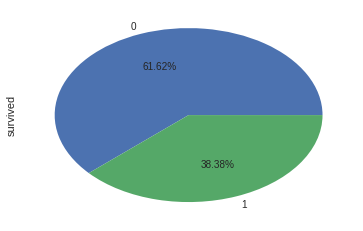

In [134]:
train_data['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [135]:
train_data.embarked[train_data.embarked.isnull()] = train_data.embarked.dropna().mode().values


In [136]:
train_data['cabin'] = train_data.cabin.fillna('U0')

In [137]:
from sklearn.ensemble import RandomForestRegressor
age_df = train_data[['age','survived','fare', 'parch', 'sibsp', 'pclass']]
age_df_notnull = age_df.loc[(train_data['age'].notnull())]
age_df_isnull = age_df.loc[(train_data['age'].isnull())]

X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['age'].isnull(), ['age']] = predictAges
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       891 non-null object
embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [138]:
train_data.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [139]:
train_data.groupby(['sex','survived'])['survived']

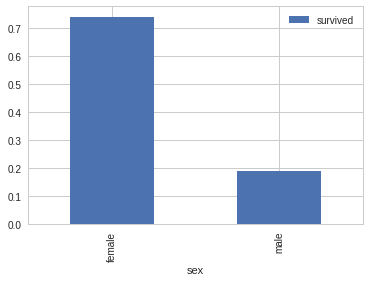

In [140]:
train_data[['sex','survived']].groupby(['sex']).mean().plot.bar()

(2) 船舱等级和生存与否的关系 Pclass

In [141]:
train_data.groupby(['pclass','survived'])['pclass'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: pclass, dtype: int64

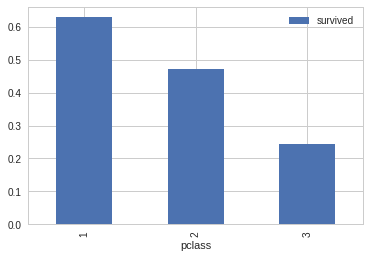

In [142]:
train_data[['pclass','survived']].groupby(['pclass']).mean().plot.bar()

不同等级船舱的男女生存率：

In [144]:
train_data.groupby(['sex', 'pclass', 'survived'])['survived'].count()

sex     pclass  survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: survived, dtype: int64

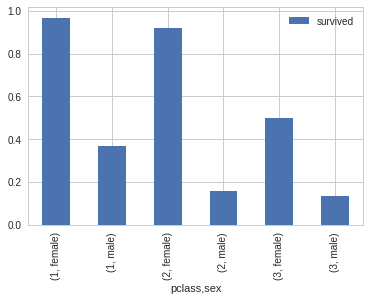

In [145]:
train_data[['sex','pclass','survived']].groupby(['pclass','sex']).mean().plot.bar()

从图和表中可以看出，总体上泰坦尼克号逃生是妇女优先，但是对于不同等级的船舱还是有一定的区别。

### (3) 年龄与存活与否的关系 Age
分别分析不同等级船舱和不同性别下的年龄分布和生存的关系：

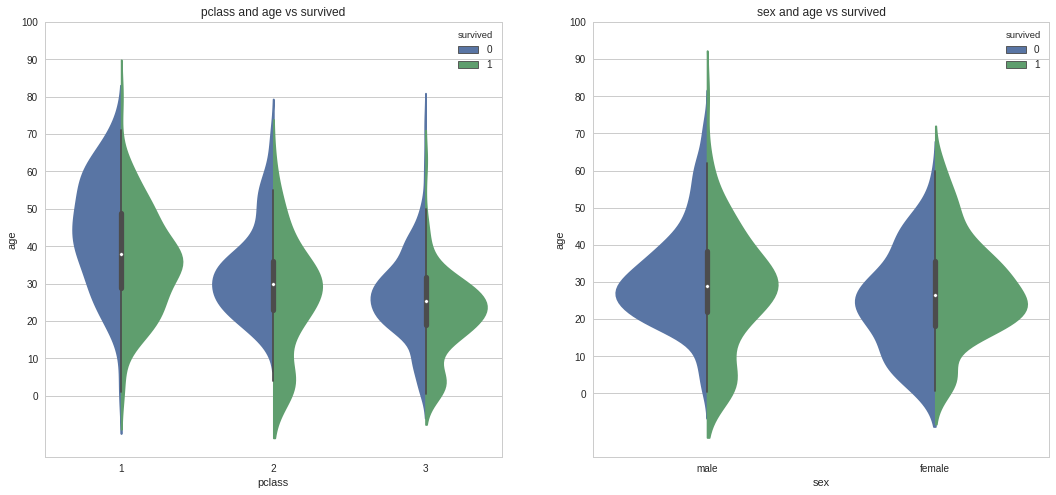

In [146]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("pclass", "age", hue="survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('pclass and age vs survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("sex", "age", hue="survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('sex and age vs survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

分析总体的年龄分布：

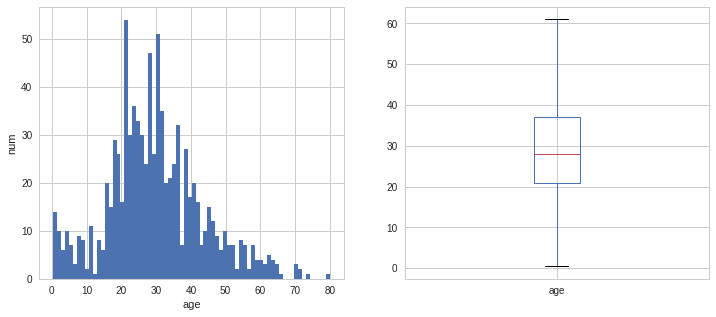

In [147]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['age'].hist(bins=70)
plt.xlabel('age')
plt.ylabel('num')

plt.subplot(122)
train_data.boxplot(column='age', showfliers=False)
plt.show()

不同年龄下的生存和非生存的分布情况：

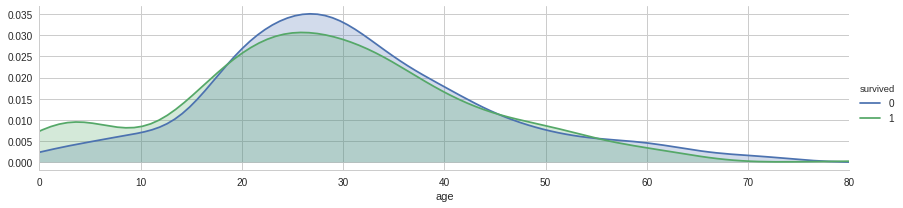

In [148]:
facet = sns.FacetGrid(train_data, hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade=True)
facet.set(xlim=(0, train_data['age'].max()))
facet.add_legend()

不同年龄下的平均生存率：

count    891.000000
mean      29.666102
std       13.735073
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64

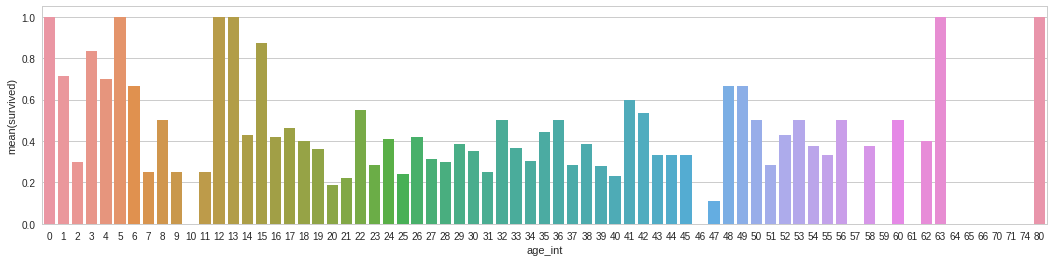

In [149]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data["age_int"] = train_data["age"].astype(int)
average_age = train_data[["age_int", "survived"]].groupby(['age_int'],as_index=False).mean()
sns.barplot(x='age_int', y='survived', data=average_age)

train_data['age'].describe()

样本有891，平均年龄约为30岁，标准差13.5岁，最小年龄为0.42，最大年龄80.

按照年龄，将乘客划分为儿童、少年、成年和老年，分析四个群体的生还情况：

age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: survived, dtype: float64

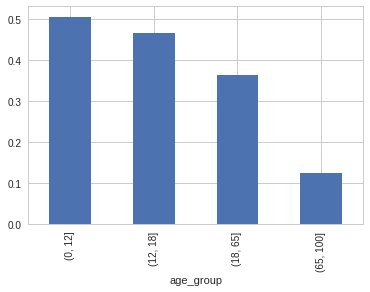

In [150]:
bins = [0, 12, 18, 65, 100]
train_data['age_group'] = pd.cut(train_data['age'], bins)
by_age = train_data.groupby('age_group')['survived'].mean()
by_age.plot(kind = 'bar')
by_age

### (4) 称呼与存活与否的关系 Name

通过观察名字数据，我们可以看出其中包括对乘客的称呼，如：Mr、Miss、Mrs等，
称呼信息包含了乘客的年龄、性别，同时也包含了如社会地位等的称呼，如：Dr,、Lady、Major、Master等的称呼。

In [151]:
train_data['title'] = train_data['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['title'], train_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


观察不同称呼与生存率的关系：

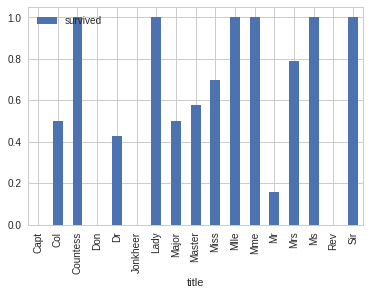

In [152]:
train_data[['title','survived']].groupby(['title']).mean().plot.bar()

同时，对于名字，我们还可以观察名字长度和生存率之间存在关系的可能：

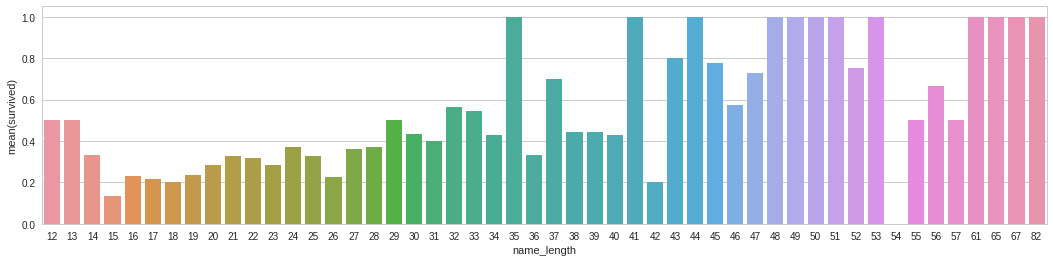

In [153]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['name_length'] = train_data['name'].apply(len)
name_length = train_data[['name_length','survived']].groupby(['name_length'],as_index=False).mean()
sns.barplot(x='name_length', y='survived', data=name_length)

### (5) 有无兄弟姐妹和存活与否的关系 SibSp

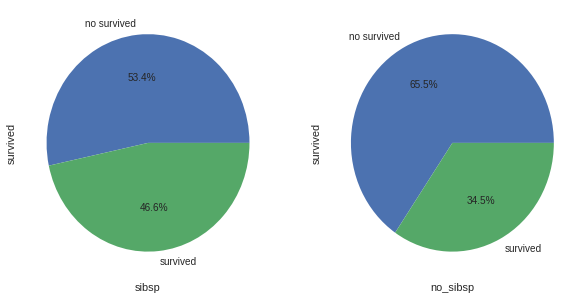

In [154]:
# 将数据分为有兄弟姐妹的和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['sibsp'] != 0]
no_sibsp_df = train_data[train_data['sibsp'] == 0]


plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['survived'].value_counts().plot.pie(labels=['no survived', 'survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['survived'].value_counts().plot.pie(labels=['no survived', 'survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

### (6) 有无父母子女和存活与否的关系 Parch

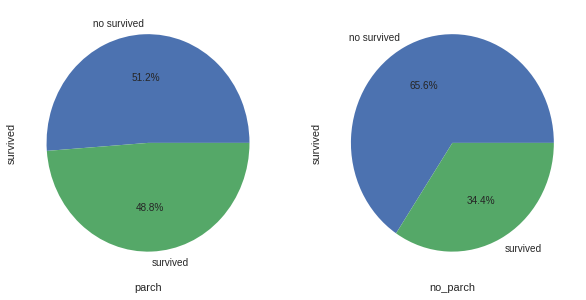

In [155]:
parch_df = train_data[train_data['parch'] != 0]
no_parch_df = train_data[train_data['parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['survived'].value_counts().plot.pie(labels=['no survived', 'survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['survived'].value_counts().plot.pie(labels=['no survived', 'survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

### (7) 亲友的人数和存活与否的关系 SibSp & Parch

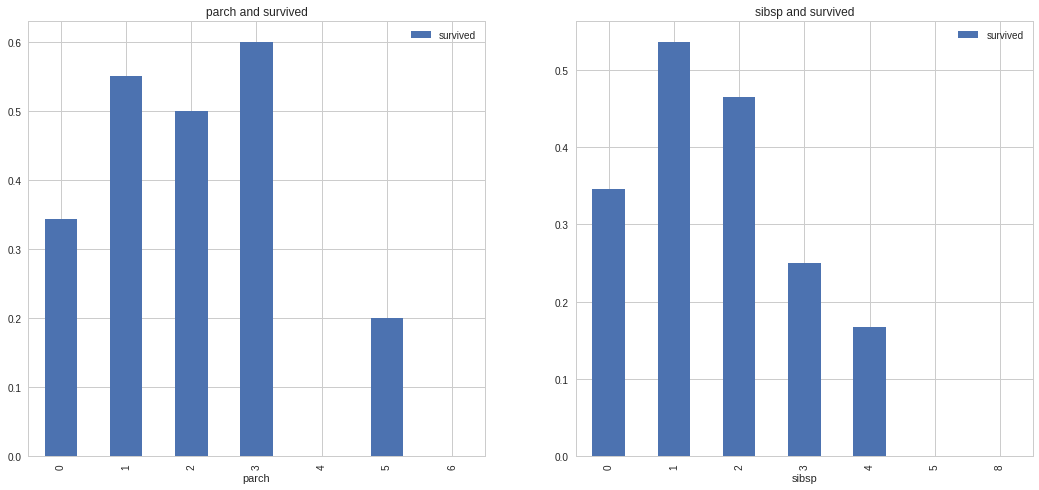

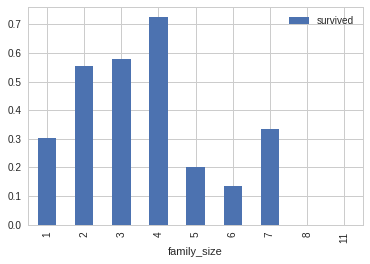

In [156]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['parch','survived']].groupby(['parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('parch and survived')
train_data[['sibsp','survived']].groupby(['sibsp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('sibsp and survived')



train_data['family_size'] = train_data['parch'] + train_data['sibsp'] + 1
train_data[['family_size','survived']].groupby(['family_size']).mean().plot.bar()

从图表中可以看出，若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低。

### (8) 票价分布和存活与否的关系 Fare

首先绘制票价的分布情况：

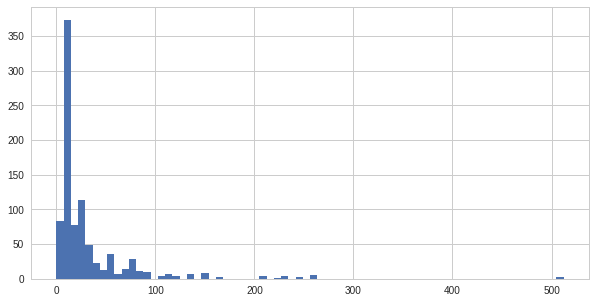

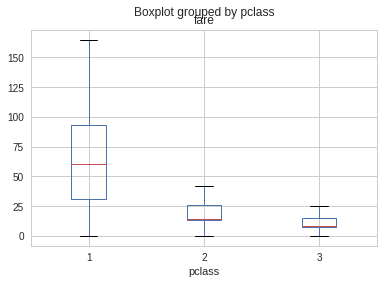

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [157]:
plt.figure(figsize=(10,5))
train_data['fare'].hist(bins = 70)

train_data.boxplot(column='fare', by='pclass', showfliers=False)
plt.show()


train_data['fare'].describe()

绘制生存与否与票价均值和方差的关系：

In [158]:
fare_not_survived = train_data['fare'][train_data['survived'] == 0]
fare_survived = train_data['fare'][train_data['survived'] == 1]
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
print(average_fare, "\n",std_fare)

           0
0  22.117887
1  48.395408 
            0
0  31.388207
1  66.596998


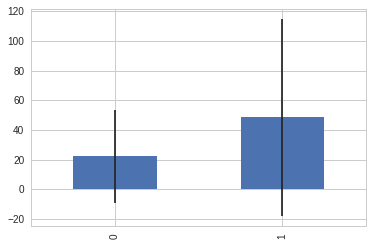

In [159]:
average_fare.plot(yerr=std_fare, kind='bar', legend=False)
# yerr 参数绘制了上下一个标准差的范围

由上图标可知，票价与是否生还有一定的相关性，生还者的平均票价要大于未生还者的平均票价。


### (9) 船舱类型和存活与否的关系 Cabin

由于船舱的缺失值确实太多，有效值仅仅有204个，很难分析出不同的船舱和存活的关系，所以在做特征工程的时候，可以直接将该组特征丢弃。

当然，这里我们也可以对其进行一下分析，对于缺失的数据都分为一类。

简单地将数据分为是否有Cabin记录作为特征，与生存与否进行分析：

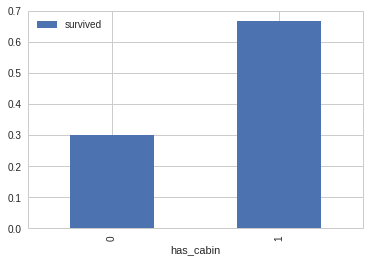

In [160]:
# Replace missing values with "U0"
train_data.loc[train_data.cabin.isnull(), 'cabin'] = 'U0'
train_data['has_cabin'] = train_data['cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['has_cabin','survived']].groupby(['has_cabin']).mean().plot.bar()

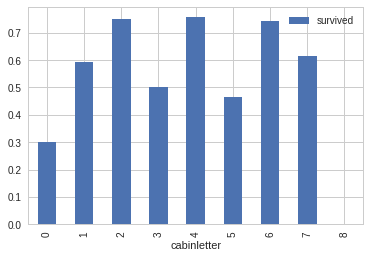

In [161]:
# create feature for the alphabetical part of the cabin number
train_data['cabinletter'] = train_data['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# train_data[['cabinletter','survived']].groupby(['cabinletter']).mean().plot.bar()
train_data['cabinletter'] = pd.factorize(train_data['cabinletter'])[0]
train_data[['cabinletter','survived']].groupby(['cabinletter']).mean().plot.bar()

可见，不同的船舱生存率也有不同，但是差别不大。所以在处理中，我们可以直接将特征删除。

### (10) 港口和存活与否的关系 Embarked

泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，那么在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难。

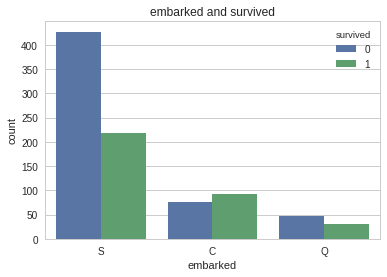

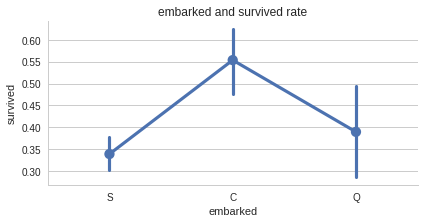

In [162]:
sns.countplot('embarked', hue='survived', data=train_data)
plt.title('embarked and survived')

sns.factorplot('embarked', 'survived', data=train_data, size=3, aspect=2)
plt.title('embarked and survived rate')
plt.show()

# http://seaborn.pydata.org/generated/seaborn.factorplot.html
# ci=95

由上可以看出，在不同的港口上船，生还率不同，C最高，Q次之，S最低。



以上为所给出的数据特征与生还与否的分析。

据了解，泰坦尼克号上共有2224名乘客。本训练数据只给出了891名乘客的信息，如果该数据集是从总共的2224人中随机选出的，根据中心极限定理，该样本的数据也足够大，那么我们的分析结果就具有代表性；但如果不是随机选取，那么我们的分析结果就可能不太靠谱了。

由上可以看出，在不同的港口上船，生还率不同，C最高，Q次之，S最低。

以上为所给出的数据特征与生还与否的分析。

据了解，泰坦尼克号上共有2224名乘客。本训练数据只给出了891名乘客的信息，如果该数据集是从总共的2224人中随机选出的，根据中心极限定理，该样本的数据也足够大，那么我们的分析结果就具有代表性；但如果不是随机选取，那么我们的分析结果就可能不太靠谱了。


### (11) 其他可能和存活与否有关系的特征

对于数据集中没有给出的特征信息，我们还可以联想其他可能会对模型产生影响的特征因素。如：乘客的国籍、乘客的身高、乘客的体重、乘客是否会游泳、乘客职业等等。

另外还有数据集中没有分析的几个特征：Ticket（船票号）、Cabin（船舱号）,这些因素的不同可能会影响乘客在船中的位置从而影响逃生的顺序。但是船舱号数据缺失，船票号类别大，难以分析规律，所以在后期模型融合的时候，将这些因素交由模型来决定其重要性。



## 4. 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。

所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。

所有的数据可以分为两类：

1.定性(Quantitative)变量可以以某种方式排序，Age就是一个很好的列子。

2.定量(Qualitative)变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。


定性(Qualitative)转换：

(1). Dummy Variables

就是类别变量或者二元变量，当qualitative variable是一些频繁出现的几个独立变量时，Dummy Variables比较适合使用。我们以Embarked为例，Embarked只包含三个值'S','C','Q'，我们可以使用下面的代码将其转换为dummies:

In [163]:
embark_dummies  = pd.get_dummies(train_data['embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['embarked'], axis=1,inplace=True)


embark_dummies = train_data[['S', 'C', 'Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


(2). Factorizing

dummy不好处理Cabin（船舱号）这种标称属性，因为他出现的变量比较多。所以Pandas有一个方法叫做factorize()，它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，这种映射最后只生成一个特征，不像dummy那样生成多个特征。

In [166]:

# Replace missing values with "U0"
train_data['cabin'][train_data.cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['cabinLetter'] = train_data['cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['cabinLetter'] = pd.factorize(train_data['cabinLetter'])[0]


train_data['cabinLetter'].head()

0    0
1    1
2    0
3    1
4    0
Name: cabinLetter, dtype: int64


定量(Quantitative)转换：

(1). Scaling

Scaling可以将一个很大范围的数值映射到一个很小的范围(通常是-1 - 1，或则是0 - 1)，很多情况下我们需要将数值做Scaling使其范围大小一样，否则大范围数值特征将会由更高的权重。比如：Age的范围可能只是0-100，而income的范围可能是0-10000000，在某些对数组大小敏感的模型中会影响其结果。

下面对Age进行Scaling：

In [167]:
from sklearn import preprocessing

assert np.size(train_data['age']) == 891
# StandardScaler will subtract the mean from each value then scale to the unit variance
scaler = preprocessing.StandardScaler()
train_data['age_scaled'] = scaler.fit_transform(train_data['age'].values.reshape(-1, 1))


train_data['age_scaled'].head()

0   -0.558454
1    0.607101
2   -0.267065
3    0.388560
4    0.388560
Name: age_scaled, dtype: float64

(2). Binning

Binning通过观察“邻居”(即周围的值)将连续数据离散化。存储的值被分布到一些“桶”或“箱“”中，就像直方图的bin将数据划分成几块一样。下面的代码对Fare进行Binning。

In [170]:
# Divide all fares into quartiles
train_data['fare_bin'] = pd.qcut(train_data['fare'], 5)
train_data['fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

在将数据Bining化后，要么将数据factorize化，要么dummies化。

In [ ]:
# qcut() creates a new variable that identifies the quartile range, but we can't use the string
# so either factorize or create dummies from the result

# factorize
train_data['fare_bin_id'] = pd.factorize(train_data['fare_bin'])[0]

# dummies
fare_bin_dummies_df = pd.get_dummies(train_data['fare_bin']).rename(columns=lambda x: 'fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [172]:
pd.get_dummies(train_data['fare_bin']).rename(columns=lambda x: 'fare_' + str(x))

,"fare_(-0.001, 7.854]","fare_(7.854, 10.5]","fare_(10.5, 21.679]","fare_(21.679, 39.688]","fare_(39.688, 512.329]"
0,1,0,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
5,0,1,0,0,0
6,0,0,0,0,1
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,0,1,0
